In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf

In [13]:
# create a portfolio of stocks with their weights from yfinance data
def create_portfolio(tickers, weights):
    data = pd.DataFrame()
    for stock in tickers:
        data[stock] = yf.download(stock, start='2019-01-01', end='2020-01-01')['Adj Close']
    data = data.dropna()
    data = data.pct_change()
    data = data.dropna()
    data = data * weights
    return data

# main function
def main():
    # create a portfolio of stocks with their weights
    tickers = ['AAPL', 'MSFT', 'AMZN', 'GOOGL', 'META']
    weights = [0.2, 0.2, 0.2, 0.2, 0.2]
    portfolio = create_portfolio(tickers, weights)
    
    return portfolio
    # # create an efficient frontier
    # num_portfolios = 10000
    # results_frame = efficient_frontier(portfolio, num_portfolios)
    
    # # plot the efficient frontier
    # plot_efficient_frontier(results_frame)
    
    # # plot the efficient frontier with the optimal portfolio
    # plot_efficient_frontier_optimal(results_frame)
    
    # # highlight the current portfolio on the efficient frontier
    # current_portfolio = [0.2, 0.2]
    # plot_efficient_frontier_current(results_frame, current_portfolio)

portfolio = main()

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [14]:
portfolio

,AAPL,MSFT,AMZN,GOOGL,META
Date,,,,,
2019-01-03,-0.019921,-0.007358,-0.005048,-0.005539,-0.005808
2019-01-04,0.008538,0.009302,0.010013,0.010259,0.009428
2019-01-07,-0.000445,0.000255,0.006871,-0.000399,0.000145
2019-01-08,0.003813,0.001450,0.003322,0.001757,0.006490
2019-01-09,0.003396,0.002860,0.000343,-0.000685,0.002385
...,...,...,...,...,...
2019-12-24,0.000190,-0.000038,-0.000423,-0.000918,-0.001028
2019-12-26,0.003968,0.001639,0.008893,0.002684,0.002603
2019-12-27,-0.000076,0.000366,0.000110,-0.001149,0.000298


In [21]:
# given the portfolio of stocks above and their weights create an efficient frontier
def efficient_frontier(portfolio, num_portfolios):
    # set the number of assets in the portfolio
    num_assets = len(portfolio.columns)
    
    # set the number of portfolios
    results = np.zeros((3 + num_assets, num_portfolios))
    
    for i in range(num_portfolios):
        # select random weights for portfolio holdings
        weights = np.array(np.random.random(num_assets))
        weights /= np.sum(weights)
        
        # calculate the portfolio returns
        portfolio_return = np.sum(portfolio.mean() * weights) * 252
        
        # calculate the portfolio volatility
        portfolio_std_dev = np.sqrt(np.dot(weights.T, np.dot(portfolio.cov() * 252, weights)))
        
        # calculate the Sharpe Ratio
        sharpe_ratio = portfolio_return / portfolio_std_dev
        
        # save the results in the results array
        results[0, i] = portfolio_return
        results[1, i] = portfolio_std_dev
        results[2, i] = sharpe_ratio
        
        # save the weights in the results array
        for j in range(len(weights)):
            results[j + 3, i] = weights[j]
    
    # create a DataFrame of the results
    results_frame = pd.DataFrame(results.T, columns=['ret', 'stdev', 'sharpe'] + [stock for stock in portfolio.columns])
    
    return results_frame

In [24]:
ef_front = efficient_frontier(portfolio, 10000)
ef_front

,ret,stdev,sharpe,AAPL,MSFT,AMZN,GOOGL,META
0,0.084060,0.040941,2.053226,0.083713,0.239607,0.117913,0.159372,0.399396
1,0.073619,0.042602,1.728070,0.072793,0.033249,0.143257,0.363998,0.386704
2,0.091642,0.040179,2.280817,0.222793,0.267648,0.204971,0.009005,0.295584
3,0.080466,0.040048,2.009243,0.182584,0.136929,0.229435,0.211030,0.240022
4,0.077673,0.039839,1.949667,0.163200,0.165871,0.334352,0.129613,0.206963
...,...,...,...,...,...,...,...,...
9995,0.089570,0.040938,2.187926,0.382436,0.116033,0.314871,0.086343,0.100317
9996,0.099431,0.039012,2.548743,0.307623,0.427867,0.083884,0.081936,0.098690
9997,0.080395,0.038424,2.092297,0.135315,0.371895,0.133390,0.317615,0.041785
9998,0.081018,0.038677,2.094736,0.118308,0.309055,0.166834,0.227753,0.178050


In [25]:
# plot the efficient frontier
def plot_efficient_frontier(results_frame):
    plt.figure(figsize=(12, 8))
    plt.scatter(results_frame.stdev, results_frame.ret, c=results_frame.sharpe, cmap='RdYlBu')
    plt.xlabel('Volatility')
    plt.ylabel('Return')
    plt.colorbar(label='Sharpe Ratio')
    plt.show()

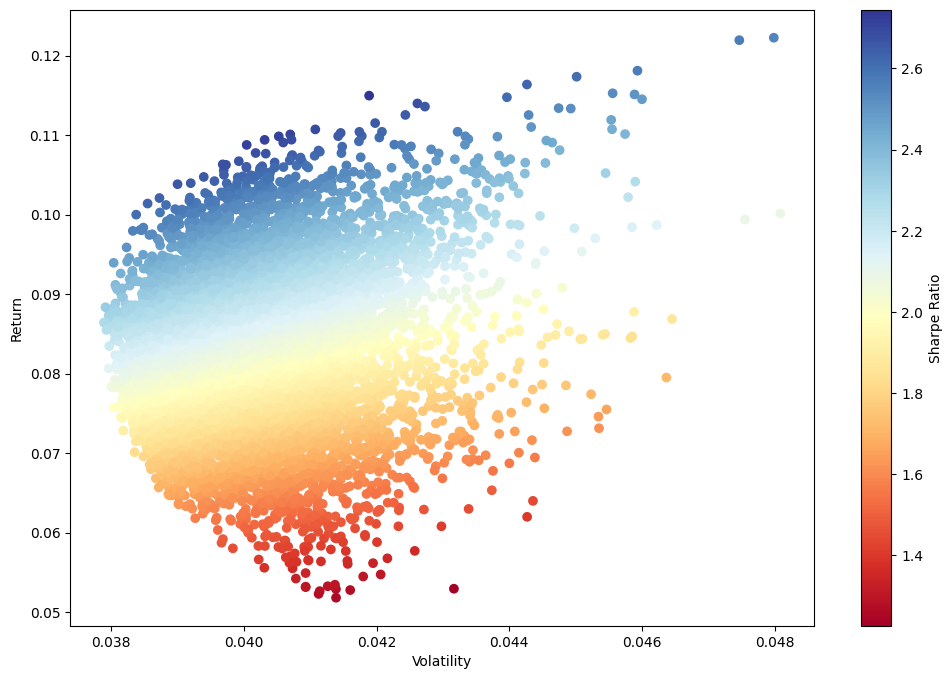

In [26]:
plot_efficient_frontier(ef_front)

In [27]:
# plot the efficient frontier with the optimal portfolio
def plot_efficient_frontier_optimal(results_frame):
    plt.figure(figsize=(12, 8))
    plt.scatter(results_frame.stdev, results_frame.ret, c=results_frame.sharpe, cmap='RdYlBu')
    plt.xlabel('Volatility')
    plt.ylabel('Return')
    plt.colorbar(label='Sharpe Ratio')
    
    # find the optimal portfolio
    max_sharpe_port = results_frame.iloc[results_frame['sharpe'].idxmax()]
    plt.scatter(max_sharpe_port[1], max_sharpe_port[0], marker='x', color='r', s=200)
    
    plt.show()

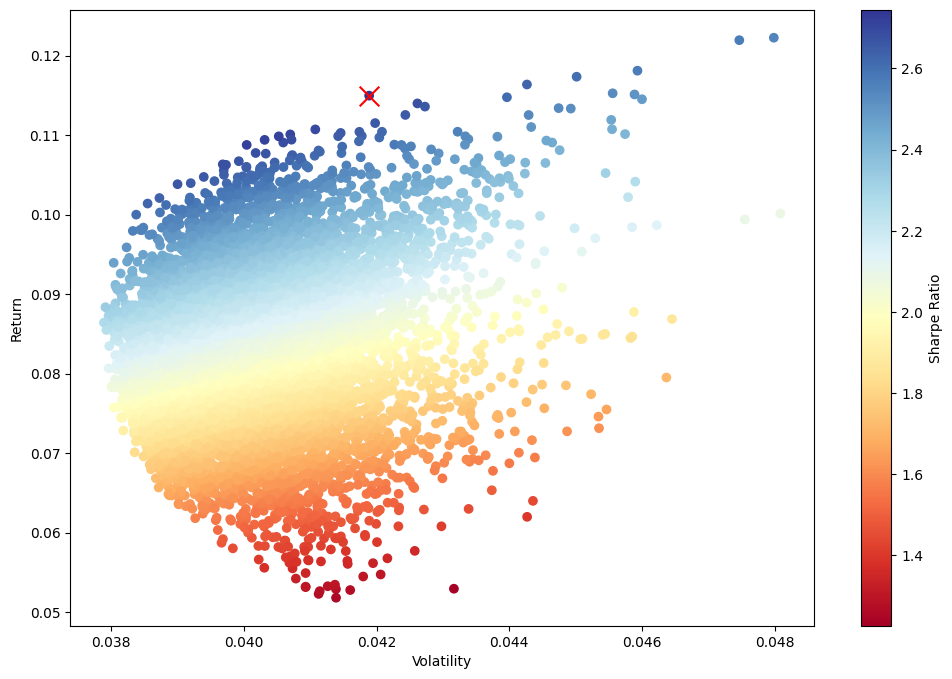

In [28]:
plot_efficient_frontier_optimal(ef_front)

In [29]:
# highlight the current portfolio on the efficient frontier
def plot_efficient_frontier_current(results_frame, current_portfolio):
    plt.figure(figsize=(12, 8))
    plt.scatter(results_frame.stdev, results_frame.ret, c=results_frame.sharpe, cmap='RdYlBu')
    plt.xlabel('Volatility')
    plt.ylabel('Return')
    plt.colorbar(label='Sharpe Ratio')
    
    # find the optimal portfolio
    max_sharpe_port = results_frame.iloc[results_frame['sharpe'].idxmax()]
    plt.scatter(max_sharpe_port[1], max_sharpe_port[0], marker='x', color='r', s=200)
    
    # highlight the current portfolio
    plt.scatter(np.sqrt(np.dot(current_portfolio, np.dot(portfolio.cov() * 252, current_portfolio))), np.sum(portfolio.mean() * current_portfolio) * 252, color='g', s=100)
    
    plt.show()

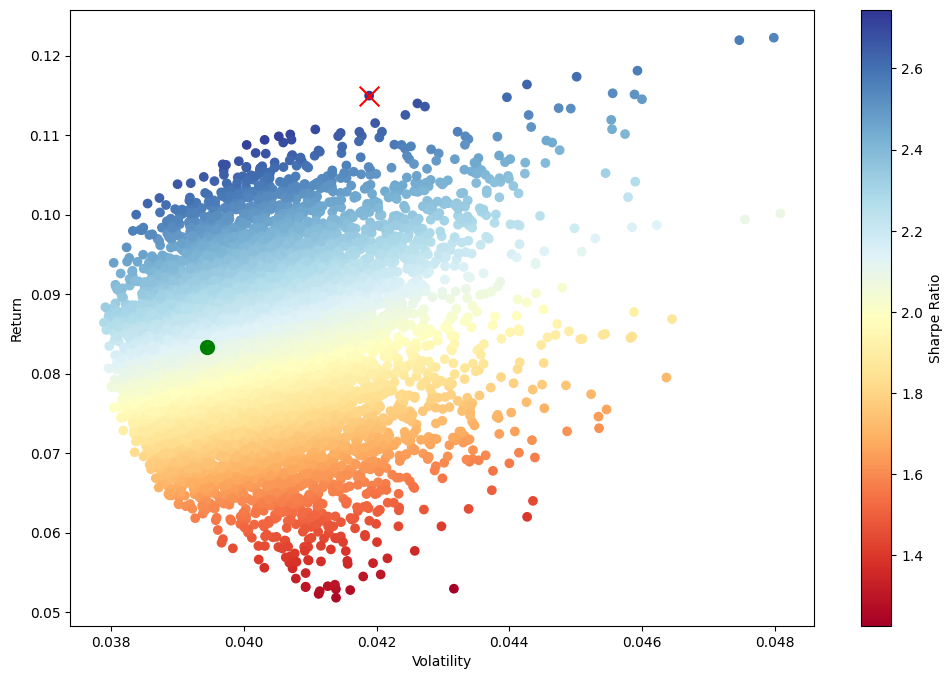

In [30]:
plot_efficient_frontier_current(ef_front, [0.2, 0.2, 0.2, 0.2, 0.2])